<a href="https://colab.research.google.com/github/nileshgode/Banking-Loan-Pred.R/blob/master/BankData_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'

In [5]:
# Loading the data using pandas
bankData = pd.read_csv(file_url, sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Printing the shape of the data
print(bankData.shape)

(45211, 17)


In [7]:
# Summarizing the statistics of the numerical raw data
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


The goal of this exercise is to define a hypothesis to check the propensity for an individual to purchase a term deposit plan against their age. We will be using a line graph for this exercise.

In [0]:
import pandas as pd
import altair as alt

In [0]:
filter_mask = bankData['y'] == 'yes'
bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [10]:
# Visualising the relationship using altair
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

From the plot, we can see that the highest number of term deposit purchases are done by customers within an age range between 25 and 40, with the propensity to buy tapering off with age. This relationship is quite counterintuitive from our assumptions in the hypothesis, right? But, wait a minute, aren't we missing an important point here? We are taking the data based on the absolute count of customers in each age range. If the proportion of banking customers is higher within the age range of 25 to 40, then we are very likely to get a plot like the one that we have got. What we really should plot is the proportion of customers, within each age group, who buy a term deposit. Let's look at how we can represent the data by taking the proportion of customers. Just like you did in the earlier steps, we will aggregate the customer propensity with respect to age, and then divide each category of buying propensity by the total number of customers in that age group to get the proportion.

In [11]:
# Getting another perspective
ageTot = bankData.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


Group the data per age using the groupby() method and find the total number of customers under each age group using the agg() method:

In [12]:
# Getting all the details in one place
ageProp = bankData.groupby(['age','y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


Now, group the data by both age and propensity of purchase and find the total counts under each category of propensity, which are yes and no:

In [13]:
# Merging both the data frames
ageComb = pd.merge(ageProp, ageTot,left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


Merge both of these DataFrames based on the age variable using the pd.merge() function, and then divide each category of propensity within each age group by the total customers in the respective age group to get the proportion of customers, as mentioned in the following code snippet:

In [14]:
# Visualising the relationship using altair
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

Now, display the proportion where you plot both categories (yes and no) as separate plots. This can be achieved through a method within altair called facet():
By the end of this exercise, you were able to get two meaningful plots showing the propensity of people to buy term deposit plans. shows two graphs in which the left graph shows the proportion of people who do not buy term deposits and the right one shows those customers who buy term deposits.

We can see, in the first graph, with the age group beginning from 22 to 60, individuals would not be inclined to purchase the term deposit. However, in the second graph, we see the opposite, where the age group of 60 and over are much more inclined to purchase the term deposit plan.

In [15]:
# Relationship between housing and propensity for term deposits
bankData.groupby(['housing', 'y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


The first part of the code is to group customers based on whether they own a house or not. The count of customers under each category is calculated with the .agg() method. From the values, we can see that the propensity to buy term deposits is much higher for people who do not own a house compared with those who do own one: ( 3354 / ( 3354 + 16727) = 17% to 1935 / ( 1935 + 23195) = 8%).

Explore the 'loan' variable to find its relationship with the propensity for a term deposit, as mentioned in the following code snippet:

In [16]:
# Relationship between having a loan and propensity for term deposits
bankData.groupby(['loan', 'y'])['y'].agg(loanTot='count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In the case of loan portfolios, the propensity to buy term deposits is higher for customers without loans: ( 4805 / ( 4805 + 33162) = 12 % to 484/ ( 484 + 6760) = 6%).

 we need to have a different strategy. One common strategy is to convert the continuous numerical data into ordinal data and look at how the propensity varies across each category.
 To convert numerical values into ordinal values, we first find the quantile values and take them as threshold values. The quantiles are obtained using the following code snippet:

In [17]:
#Taking the quantiles for 25%, 50% and 75% of the balance data
import numpy as np
np.quantile(bankData['balance'],[0.25,0.5,0.75])

array([  72.,  448., 1428.])

Now, convert the numerical values of bank balances into categorical values, as mentioned in the following code snippet:

In [18]:
bankData['balanceClass'] = 'Quant1'
bankData.loc[(bankData['balance'] > 72) & (bankData['balance'] < 448), 'balanceClass'] = 'Quant2'
bankData.loc[(bankData['balance'] > 448) & (bankData['balance'] < 1428), 'balanceClass'] = 'Quant3'
bankData.loc[bankData['balance'] > 1428, 'balanceClass'] = 'Quant4'
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


Next, we need to find the propensity of term deposit purchases based on each quantile the customers fall into. 

In [19]:
# Calculating the customers under each quantile
balanceTot = bankData.groupby(['balanceClass'])['y'].agg(balanceTot='count').reset_index()
balanceTot

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


Calculate the total number of customers categorized by quantile and propensity classification, as mentioned in the following code snippet:

In [20]:
# Calculating the total customers categorised as per quantile and propensity classification
balanceProp = bankData.groupby(['balanceClass', 'y'])['y'].agg(balanceCat='count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [21]:
# Merging both the data frames
balanceComb = pd.merge(balanceProp, balanceTot, on = ['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat / balanceComb.balanceTot)*100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


From the distribution of data, we can see that, as we move from Quantile 1 to Quantile 4, the proportion of customers who buy term deposits keeps on increasing. For instance, of all of the customers who belong to Quant 1, 7.25% have bought term deposits (we get this percentage from catProp). This proportion increases to 10.87 % for Quant 2 and thereafter to 12.52 % and 16.15% for Quant 3 and Quant4, respectively. From this trend, we can conclude that individuals with higher balances have more propensity for term deposits.

The overall trend that we can observe is that people with more cash in hand (no loans and a higher balance) have a higher propensity to buy term deposits.

For instance, a higher bank balance or home ownership will have a positive bearing on the overall asset index and, therefore, will be assigned a higher weight. In contrast, the presence of a loan will be a liability and, therefore, will have to have a lower weight. Let's give a weight of 5 if the customer has a house and 1 in its absence. Similarly, we can give a weight of 1 if the customer has a loan and 5 in case of no loans:

In [0]:
# Normalizing data
from sklearn import preprocessing
x = bankData[['balance']].values.astype(float)

In [0]:
minmaxScaler = preprocessing.MinMaxScaler()

In [0]:
bankData['balanceTran'] = minmaxScaler.fit_transform(x)

In [25]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072812


In the case of the bank balance dataset, which contains numerical values, we need to first normalize the data. The purpose of normalization is to bring all of the variables that we are using to create the new feature into a common scale. One effective method we can use here for the normalizing function is called MinMaxScaler(), which converts all of the numerical data between a scaled range of 0 to 1. The MinMaxScaler function is available within the preprocessing method in sklearn. In this step, we created a new feature called 'balanceTran' to store the normalized bank balance values.

After creating the normalized variable, add a small value of 0.001 so as to eliminate the 0 values in the variable. This is mentioned in the following code snippet:

In [0]:
#Adding a small numerical constant to eliminate 0 values
bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

The purpose of adding this small value is because, in the subsequent steps, we will be multiplying three transformed variables together to form a composite index. The small value is added to avoid the variable values becoming 0 during the multiplying operation.

Now, add two additional columns for introducing the transformed variables for loans and housing, as per the weighting approach discussed at the start of this exercise:

In [27]:
# Let us transform values for loan data
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loc[bankData['loan'] == 'no', 'loanTran'] = 5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5


We transformed values for the loan data as per the weighting approach. When a customer has a loan, it is given a weight of 1, and when there's no loan, the weight assigned is 5. The value of 1 and 5 are intuitive weights we are assigning. What values we assign can vary based on the business context you may be provided with.

In [0]:
#Let us transform values for Housing data
bankData['houseTran'] = 5

In [29]:
bankData.loc[bankData['housing'] == 'no', 'houseTran'] = 1
print(bankData.head())

   age           job  marital  ... balanceTran loanTran  houseTran
0   58    management  married  ...    0.092269        5          5
1   44    technician   single  ...    0.073077        5          5
2   33  entrepreneur  married  ...    0.072832        1          5
3   47   blue-collar  married  ...    0.086486        5          5
4   33       unknown   single  ...    0.072822        5          1

[5 rows x 21 columns]


In [30]:
# Let us now create the new variable which is a product of all these
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


We observe the relationship between the asset index and the propensity of term deposit purchases. We adopt a similar strategy of converting the numerical values of the asset index into ordinal values by taking the quantiles and then mapping the quantiles to the propensity of term deposit purchases,

In [31]:
# Finding the quantile
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

array([0.37668646, 0.56920367, 1.9027249 ])

In [32]:
bankData['assetClass'] = 'Quant1'
bankData.loc[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'
bankData.loc[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'
bankData.loc[bankData['assetIndex'] > 1.9, 'assetClass'] = 'Quant4'
bankData.head()
bankData.assetClass[bankData['assetIndex'] > 1.9] = 'Quant4'
bankData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [0]:
# Calculating total of each asset class
assetTot = bankData.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = bankData.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()

In [34]:
# Merging both the data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10921,12212,89.428431
1,Quant1,yes,1291,12212,10.571569
2,Quant2,no,8436,10400,81.115385
3,Quant2,yes,1964,10400,18.884615
4,Quant3,no,10144,11121,91.214819
5,Quant3,yes,977,11121,8.785181
6,Quant4,no,10421,11478,90.791079
7,Quant4,yes,1057,11478,9.208921


From the new feature we created, we can see that 18.88% (we get this percentage from catProp) of customers who are in Quant2 have bought term deposits compared to 10.57 % for Quant1, 8.78% for Quant3, and 9.28% for Quant4. Since Quant2 has the highest proportion of customers who have bought term deposits, we can conclude that customers in Quant2 have higher propensity to purchase the term deposits than all other customers.

In [35]:
# Looking at Data types
print(bankData.dtypes)
# Looking at descriptive statistics
print(bankData.describe())

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object
                age        balance  ...     houseTran    assetIndex
count  45211.000000   45211.000000  ...  45211.000000  45211.000000
mean      40.936210    1362.272058  ...      3.223353      1.179189
std       10.618762    3044.765829  ...      1.987511      0.952080
min       18.000000   -8019.000000  ...      1.000000      0.000010
25%       33.000000      72.000000  ...      1.000000      0.376686
50%       39.000000     44

The above output is that of a descriptive summary statistic, which displays some of the basic measures such as mean, standard deviation, count, and the quantile values of the respective features:

The purpose of a descriptive summary is to get a quick feel of the data with respect to the distribution and some basic statistics such as mean and standard deviation. Getting a perspective on the summary statistics is critical for thinking about what kind of transformations are required for each variable.

we will be creating a correlation plot and analyzing the results of the bank dataset.

In [0]:
from pandas import set_option

In [0]:
bankNumeric = bankData[['age','balance','day','duration','campaign','pdays','previous']]

In [38]:
set_option('display.width',150)
set_option('precision',3)
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


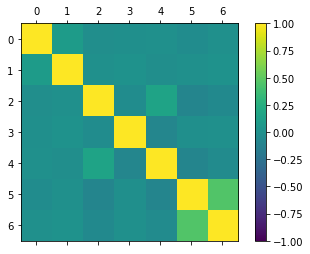

In [39]:
from matplotlib import pyplot
corFig = pyplot.figure()
figAxis = corFig.add_subplot(111)
corAx = figAxis.matshow(bankCorr,vmin=-1,vmax=1)
corFig.colorbar(corAx)
pyplot.show()

candidates are the high correlation between 'balance' and 'balanceTran' and the 'asset index' with many of the transformed variables that we created in the earlier exercise. Other than that, there aren't many variables that are highly correlated.

In [44]:
# Skewness of numeric attributes
bankNumeric.skew()

age          0.685
balance      8.360
day          0.093
duration     3.144
campaign     4.899
pdays        2.616
previous    41.846
dtype: float64

The preceding matrix is the skewness index. Any value closer to 0 indicates a low degree of skewness. Positive values indicate right skew and negative values, left skew. Variables that show higher values of right skew and left skew are candidates for further feature engineering by normalization. Let's now visualize the skewness by plotting histograms and density plots.

Text(0.5, 1.0, 'Distribution of Asset Index')

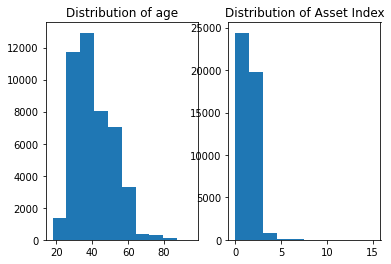

In [55]:
# Histograms
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,2)

axs[0].hist(bankData['age'])
axs[0].set_title('Distribution of age')

axs[1].hist(bankData['assetIndex'])
axs[1].set_title('Distribution of Asset Index')

From the histogram, we can see that the age variable has a distribution closer to the bell curve with a lower degree of skewness. In contrast, the asset index shows a relatively higher right skew, which makes it a more probable candidate for normalization.

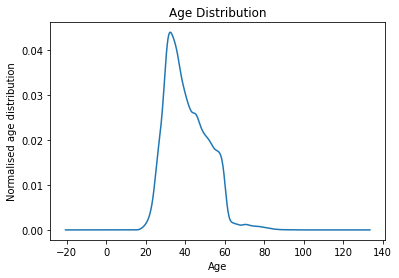

In [57]:
# Density plots
bankData['age'].plot(kind = 'density',subplots = False,layout = (1,1))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Normalised age distribution')
pyplot.show()

Density plots help in getting a smoother visualization of the distribution of the data. From the density plot of Age, we can see that it has a distribution similar to a bell curve.

We will now look into two other similar data transformation techniques, namely, standard scaler and normalizer. Standard scaler standardizes data to a mean of 0 and standard deviation of 1. The mean is the average of the data and the standard deviation is a measure of the spread of data. By standardizing to the same mean and standard deviation, comparison across different distributions of data is enabled.

The normalizer function normalizes the length of data. This means that each value in a row is divided by the normalization of the row vector to normalize the row. The normalizer function is applied on the rows while standard scaler is applied column-wise. The normalizer and standard scaler functions are important feature engineering steps that are applied to the data before downstream modeling steps. Let's look at both of these techniques:

In [58]:
# Standardize data ( 0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaling = StandardScaler().fit(bankNumeric)
rescaledNum = scaling.transform(bankNumeric)
set_printoptions(precision = 3)
print(rescaledNum)

[[ 1.607  0.256 -1.298 ... -0.569 -0.411 -0.252]
 [ 0.289 -0.438 -1.298 ... -0.569 -0.411 -0.252]
 [-0.747 -0.447 -1.298 ... -0.569 -0.411 -0.252]
 ...
 [ 2.925  1.43   0.143 ...  0.722  1.436  1.05 ]
 [ 1.513 -0.228  0.143 ...  0.399 -0.411 -0.252]
 [-0.371  0.528  0.143 ... -0.247  1.476  4.524]]


The following code uses the normalizer data transmission techniques:

In [59]:
# Normalizing Data ( Length of 1)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer().fit(bankNumeric)
normalisedNum = normaliser.transform(bankNumeric)

set_printoptions(precision = 3)
print(normalisedNum)

[[ 2.686e-02  9.923e-01  2.315e-03 ...  4.630e-04 -4.630e-04  0.000e+00]
 [ 2.750e-01  1.812e-01  3.125e-02 ...  6.249e-03 -6.249e-03  0.000e+00]
 [ 3.974e-01  2.408e-02  6.021e-02 ...  1.204e-02 -1.204e-02  0.000e+00]
 ...
 [ 1.235e-02  9.805e-01  2.917e-03 ...  8.579e-04  3.157e-02  5.147e-04]
 [ 6.775e-02  7.940e-01  2.021e-02 ...  4.754e-03 -1.189e-03  0.000e+00]
 [ 1.234e-02  9.906e-01  5.668e-03 ...  6.669e-04  6.269e-02  3.668e-03]]


The output from standard scaler is normalized along the columns. The output would have 11 columns corresponding to 11 numeric columns (age, balance, day, duration, and so on). If we observe the output, we can see that each value along a column is normalized so as to have a mean of 0 and standard deviation of 1. By transforming data in this way, we can easily compare across columns.

Many machine learning algorithms converge faster when the features are of a similar scale or are normally distributed. Standardizing is more useful in algorithms that assume input variables to have a Gaussian structure. Algorithms such as linear regression, logistic regression, and linear discriminate analysis fall under this genre. Normalization techniques would be more congenial for sparse datasets (datasets with lots of zeros) when using algorithms such as k-nearest neighbor or neural networks.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

As you can see in the dataset, we have two types of data: the numerical data and the ordinal data. Machine learning algorithms need numerical representation of data and, therefore, we must convert the ordinal data into a numerical form by creating dummy variables. The dummy variable will have values of either 1 or 0 corresponding to whether that category is present or not. The function we use for converting ordinal data into numerical form is pd.get_dummies(). This function converts the data structure into a long form or horizontal form. So, if there are three categories in a variable, there will be three new variables created as dummy variables corresponding to each of the categories.

In [62]:
# Converting all the categorical variables to dummy variables
bankCat = pd.get_dummies(bankData[['job','marital','education','default','housing','loan','contact','month','poutcome']])
bankCat.shape

(45211, 44)

We now have a new subset of the data corresponding to the categorical data that was converted into numerical form. Also, we had some numerical variables in the original dataset, which did not need any transformation. The transformed categorical data and the original numerical data have to be combined to get all of the original features. To combine both, let's first extract the numerical data from the original DataFrame.

In [63]:
bankNum = bankData[['age','balance','day','duration','campaign','pdays','previous']]
bankNum.shape

(45211, 7)

Now, prepare the X and Y variables and print the Y shape. The X variable is the concatenation of the transformed categorical variable and the separated numerical data:

In [64]:
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,1,5,198,1,-1,0


Once the DataFrame is created, we can split the data into training and test sets. We specify the proportion in which the DataFrame must be split into training and test sets.

In [0]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [73]:
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
pred = bankModel.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.89


From an initial look, an accuracy metric of 90% gives us the impression that the model has done a decent job of approximating the data generating process. Or is it otherwise? Let's take a closer look at the details of the prediction by generating the metrics for the model. We will use two metric-generating functions, the confusion matrix and classification report:

In [75]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]


Next, let's generate a classification_report:

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11998
         yes       0.57      0.21      0.30      1566

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



From the metrics, we can see that, out of the total 11,998 examples of no, 11,754 were correctly classified as no and the balance, 244, were classified as yes. This gives a recall value of 11,754/11,998, which is nearly 97.96 %. From a precision perspective, out of the total 12,996 examples that were predicted as no, only 11,754 of them were really no, which takes our precision to 11,754/12,996 or 90.44 %.

From an overall accuracy level, this can be calculated as follows: correctly classified examples / total examples = (11754 + 224) / 13564 = 88.30 %.

As the data scientist of the bank, you created a benchmark model to predict which customers are likely to buy a term deposit. However, management wants to improve the results you got in the benchmark model. 